In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

In [17]:
names=['ip','app','device','os','channel','click_time','attributed_time','is_attributed']
df=pd.read_csv('https://raw.githubusercontent.com/shawon100/Fraud-Adclick-Detection/master/train_sample.csv',names=names, na_filter=False,dtype='object')
df = df.drop(df.index[0])
df=df.drop('click_time', axis=1)
df=df.drop('attributed_time', axis=1)
df.head(10)


,ip,app,device,os,channel,is_attributed
1,87540,12,1,13,497,0
2,105560,25,1,17,259,0
3,101424,12,1,19,212,0
4,94584,13,1,13,477,0
5,68413,12,1,1,178,0
6,93663,3,1,17,115,0
7,17059,1,1,17,135,0
8,121505,9,1,25,442,0
9,192967,2,2,22,364,0
10,143636,3,1,19,135,0


Text(0,0.5,'Fraud or Not')

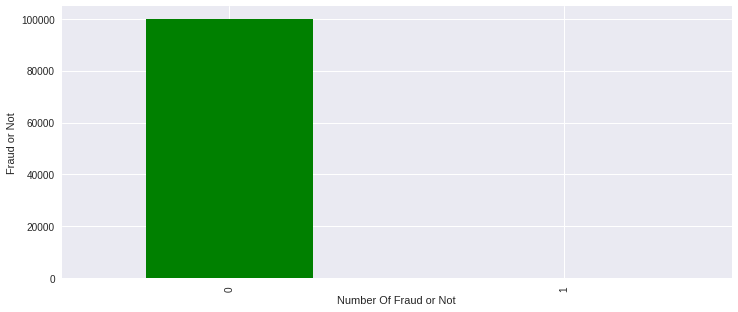

In [18]:
df.is_attributed.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Number Of Fraud or Not')
plt.ylabel('Fraud or Not')

In [19]:
X=np.array(df[names[:4]])
print(X)


[['87540' '12' '1' '13']
 ['105560' '25' '1' '17']
 ['101424' '12' '1' '19']
 ...
 ['18839' '3' '1' '13']
 ['114276' '15' '1' '12']
 ['119349' '14' '1' '15']]


In [20]:
y=np.array(df[names[7]])
print(y)

['0' '0' '0' ... '0' '0' '0']


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 20,stratify=y)
#X_train,y_train=shuffle(X_train,y_train)
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train.ravel())
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(X_train)


[['86353' '21' '1' '19']
 ['175559' '3' '1' '8']
 ['167216' '3' '1' '18']
 ...
 ['19091' '2' '1' '30']
 ['255629' '29' '1' '13']
 ['166850' '3' '1' '13']]


In [0]:
from scipy.sparse import csr_matrix
#X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[2:])
#X_train_tfidf = X_train_tfidf.tranpose()
clf=linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs').fit(X_train,y_train)

In [24]:
print('Train Accuracy = ',metrics.accuracy_score(y_train,clf.predict(X_train)))
print('Test Accuracy = ',metrics.accuracy_score(y_test,clf.predict(X_test)))

Train Accuracy =  0.9977285714285714
Test Accuracy =  0.9977333333333334
